# ML Project 6

## Importing Libraries and Data

In [3]:
import os 
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Model kütüphanelerini, modeli kurarken
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [5]:
project_6 = pd.read_csv("winequality-red.csv")

In [6]:
project_6

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Analysing Data

In [8]:
project_6.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


### .info()

In [10]:
project_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### .describe()

In [12]:
project_6.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### .columns 

In [14]:
project_6.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### .unique() ve .nunique()

In [16]:
project_6["quality"].nunique()

6

In [17]:
project_6["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### .count()

In [19]:
project_6.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

### .isnull().sum()

In [21]:
project_6.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### .duplicated() ve drop_duplicated()

In [23]:
project_6.duplicated().sum()

240

In [24]:
project_6[project_6.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


### .value_counts()

In [26]:
project_6["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### .corr() and heatmap()

<Axes: >

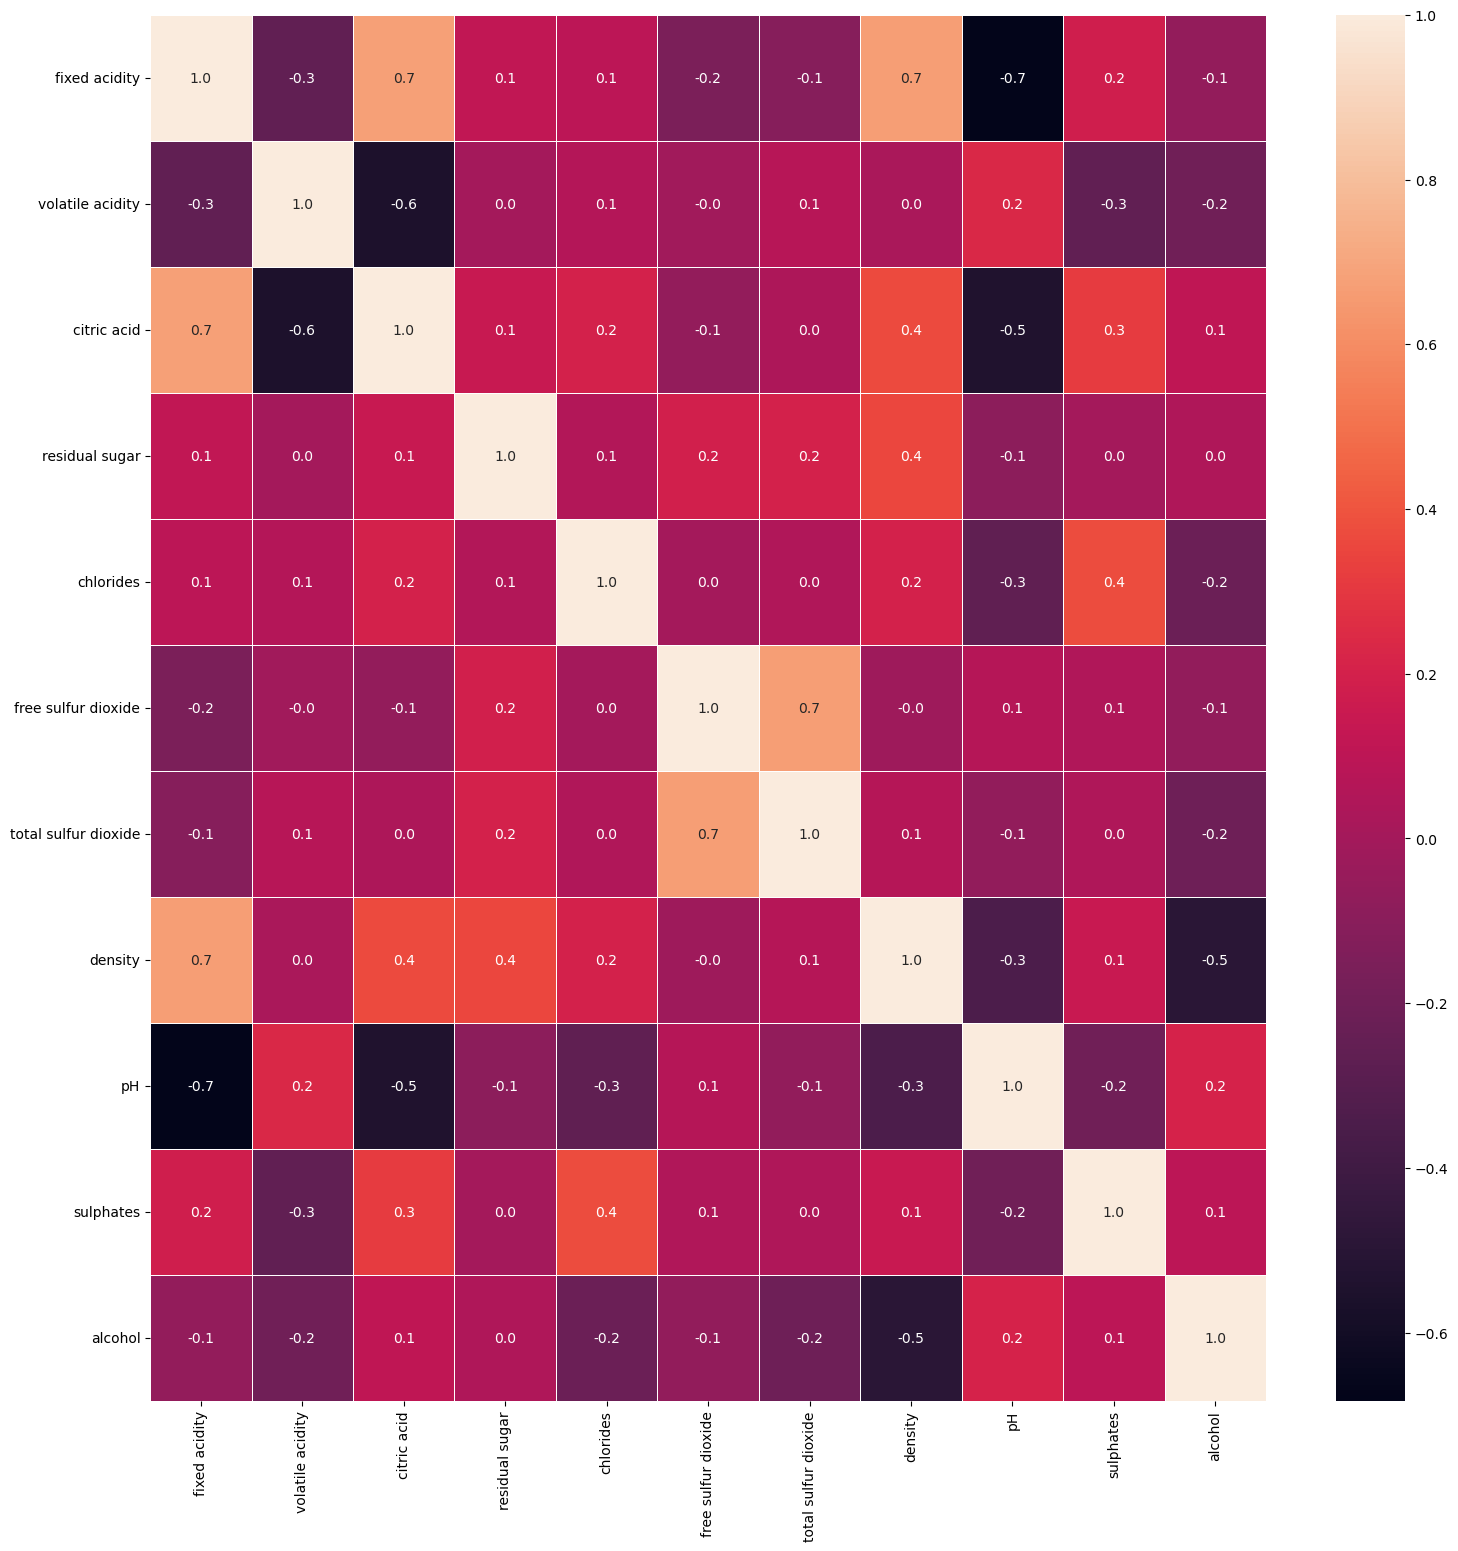

In [28]:
cor = project_6.drop(columns = "quality").corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cor, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Data Visualization 

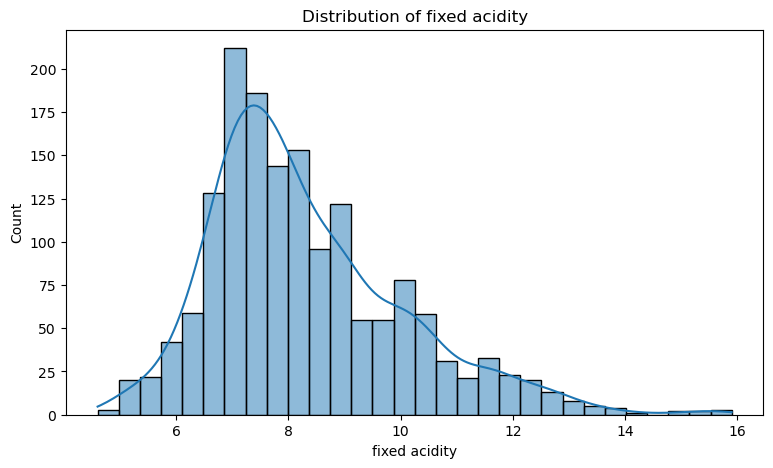

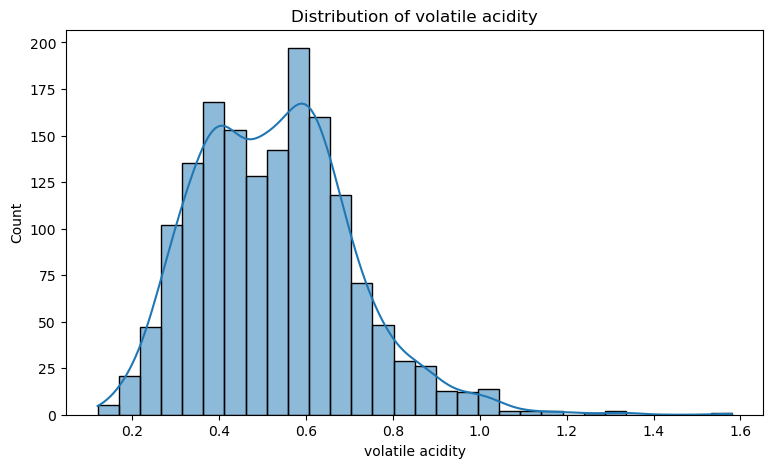

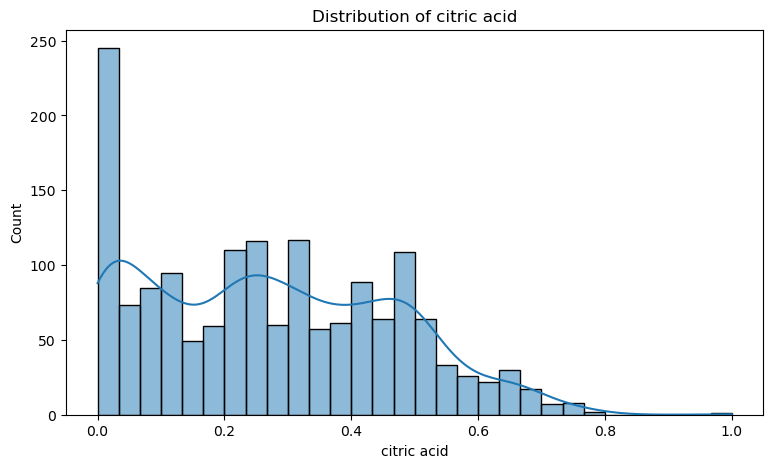

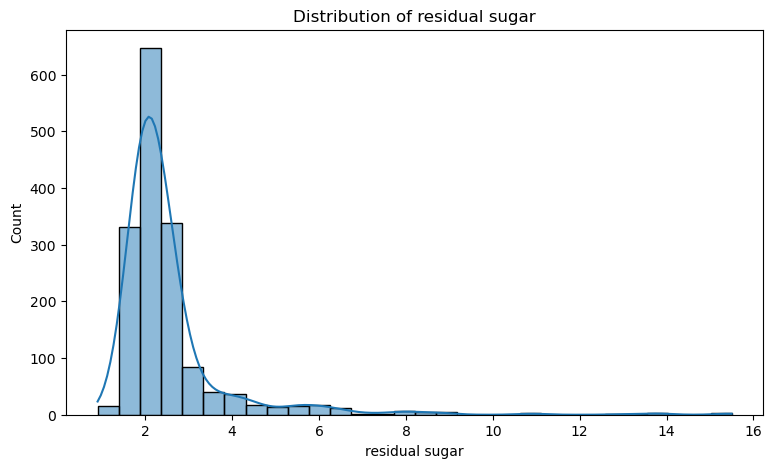

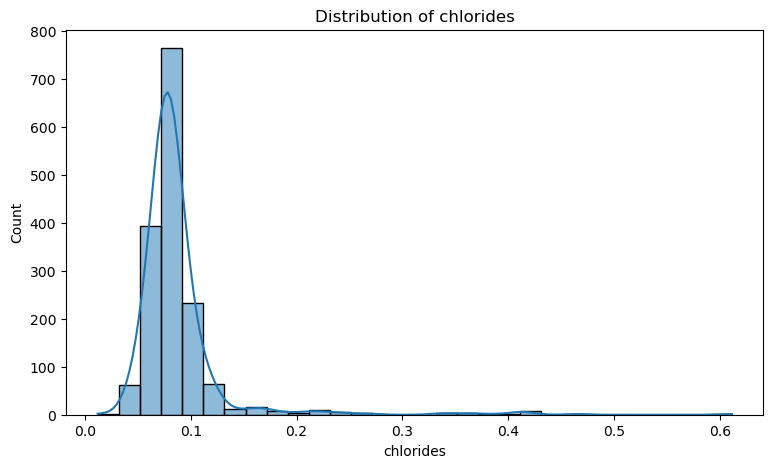

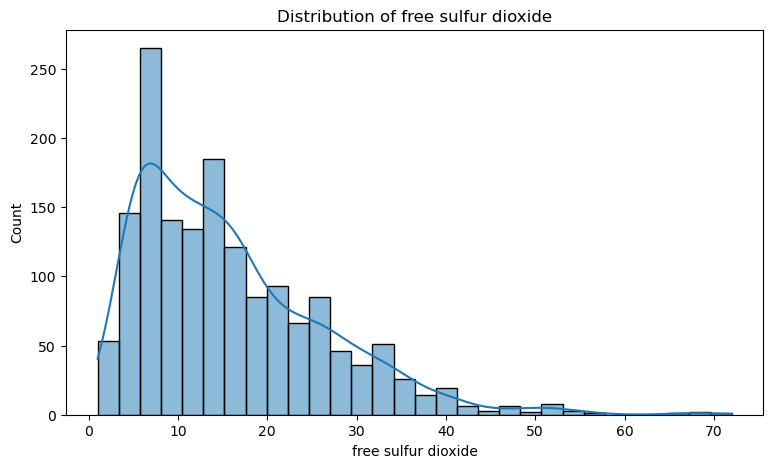

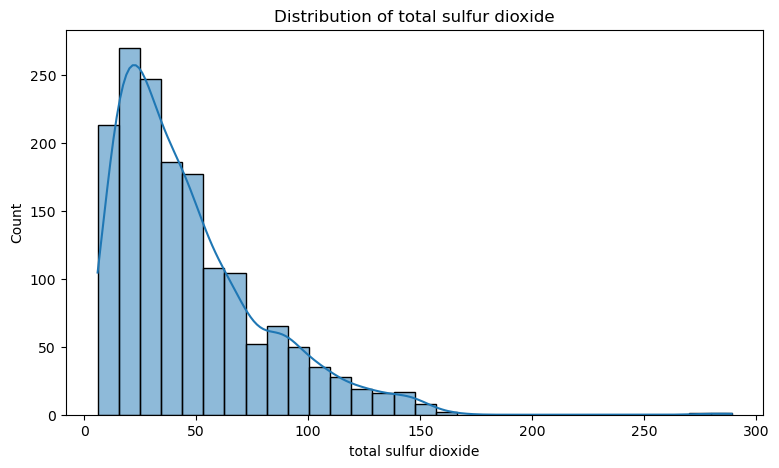

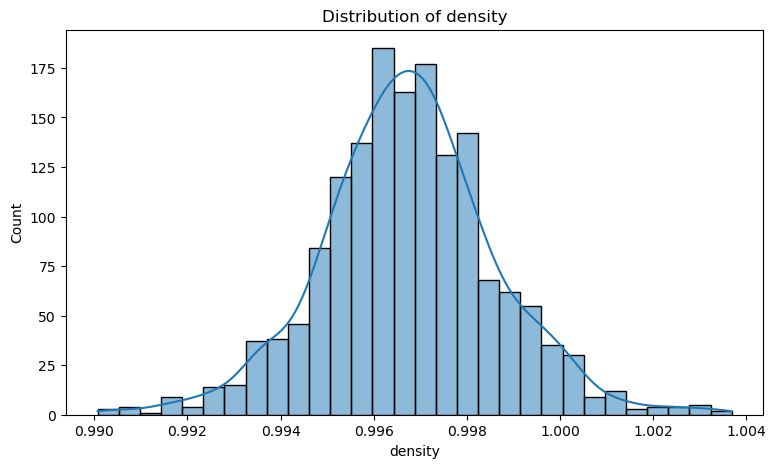

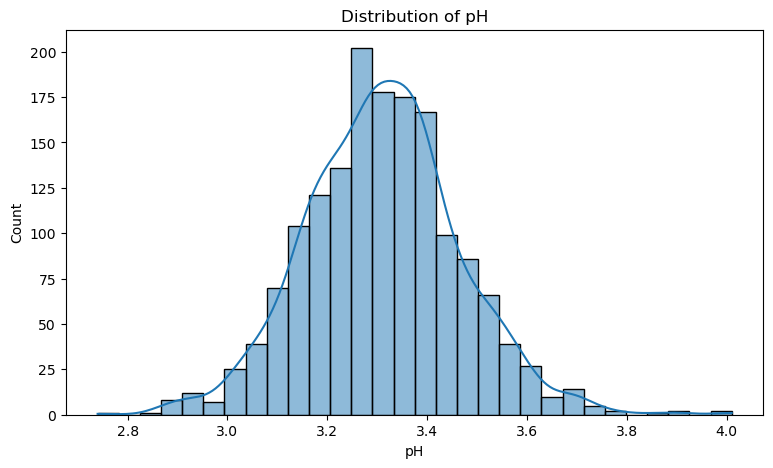

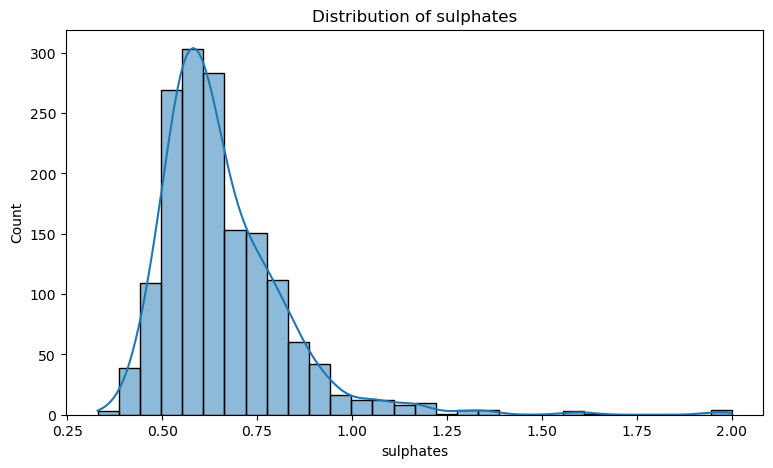

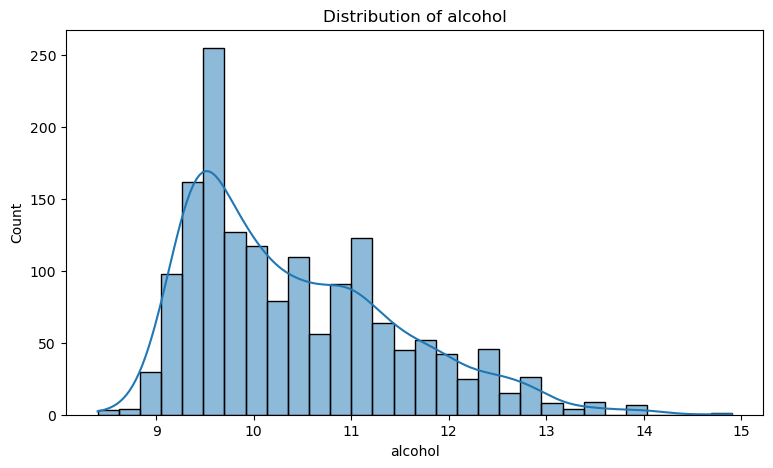

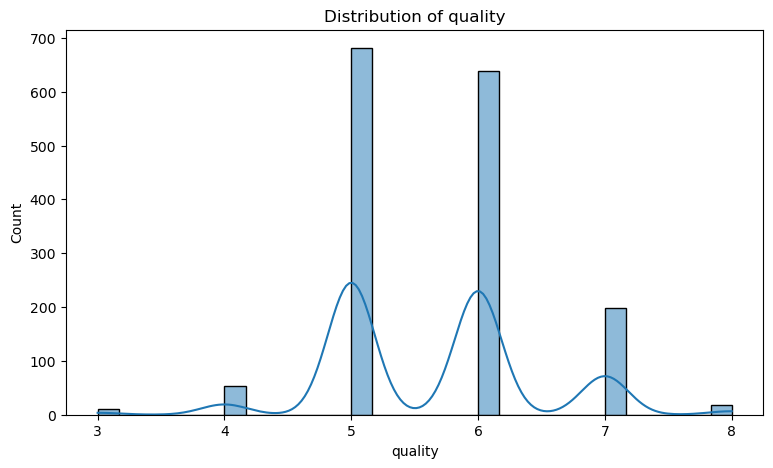

In [30]:
for column in project_6:
    plt.figure(figsize=(9, 5))
    sns.histplot(data=project_6, x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

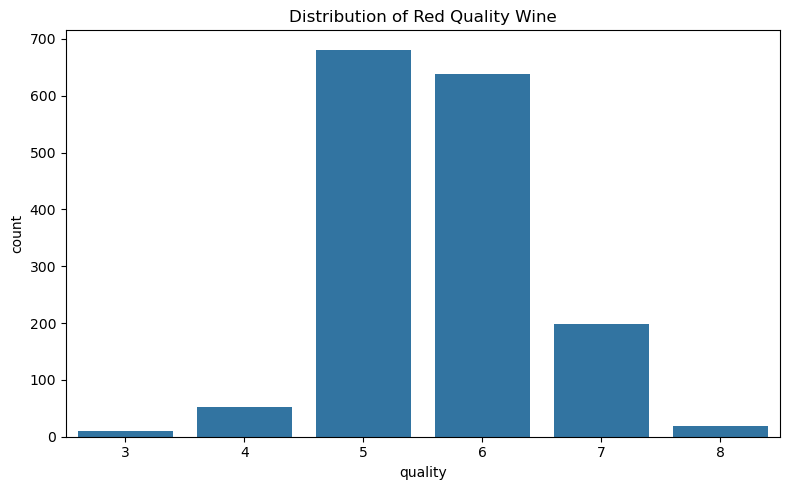

In [31]:
# Set custom labels
labels = ["3", "4", "5", "6", "7", "8"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=project_6, x='quality', ax=ax)
ax.set_title('Distribution of Red Quality Wine')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## Separating Data

In [33]:
X = project_6.drop(columns = "quality", axis = 1)
y = project_6["quality"]

In [34]:
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [35]:
y.head(3)

0    5
1    5
2    5
Name: quality, dtype: int64

## Label Binarization

+ `quality` sütunundaki değerler için bir ölçekleme var:

Eğer değer >6.5 ise 'good', değilse 'bad' olarak etiketlenmiş. Biz de 7 ve üzeri olan değerleri 1, 7'nin altında olanları 0 olarak etiketleyeceğiz.

In [38]:
y = project_6["quality"].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [39]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

## Splitting Data 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1439, 11) (160, 11)


In [43]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1439,) (160,)


## Feature Scaling with `StandardScaler`

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [46]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### .corr() and .heatmap() (with standardization data)

<Axes: >

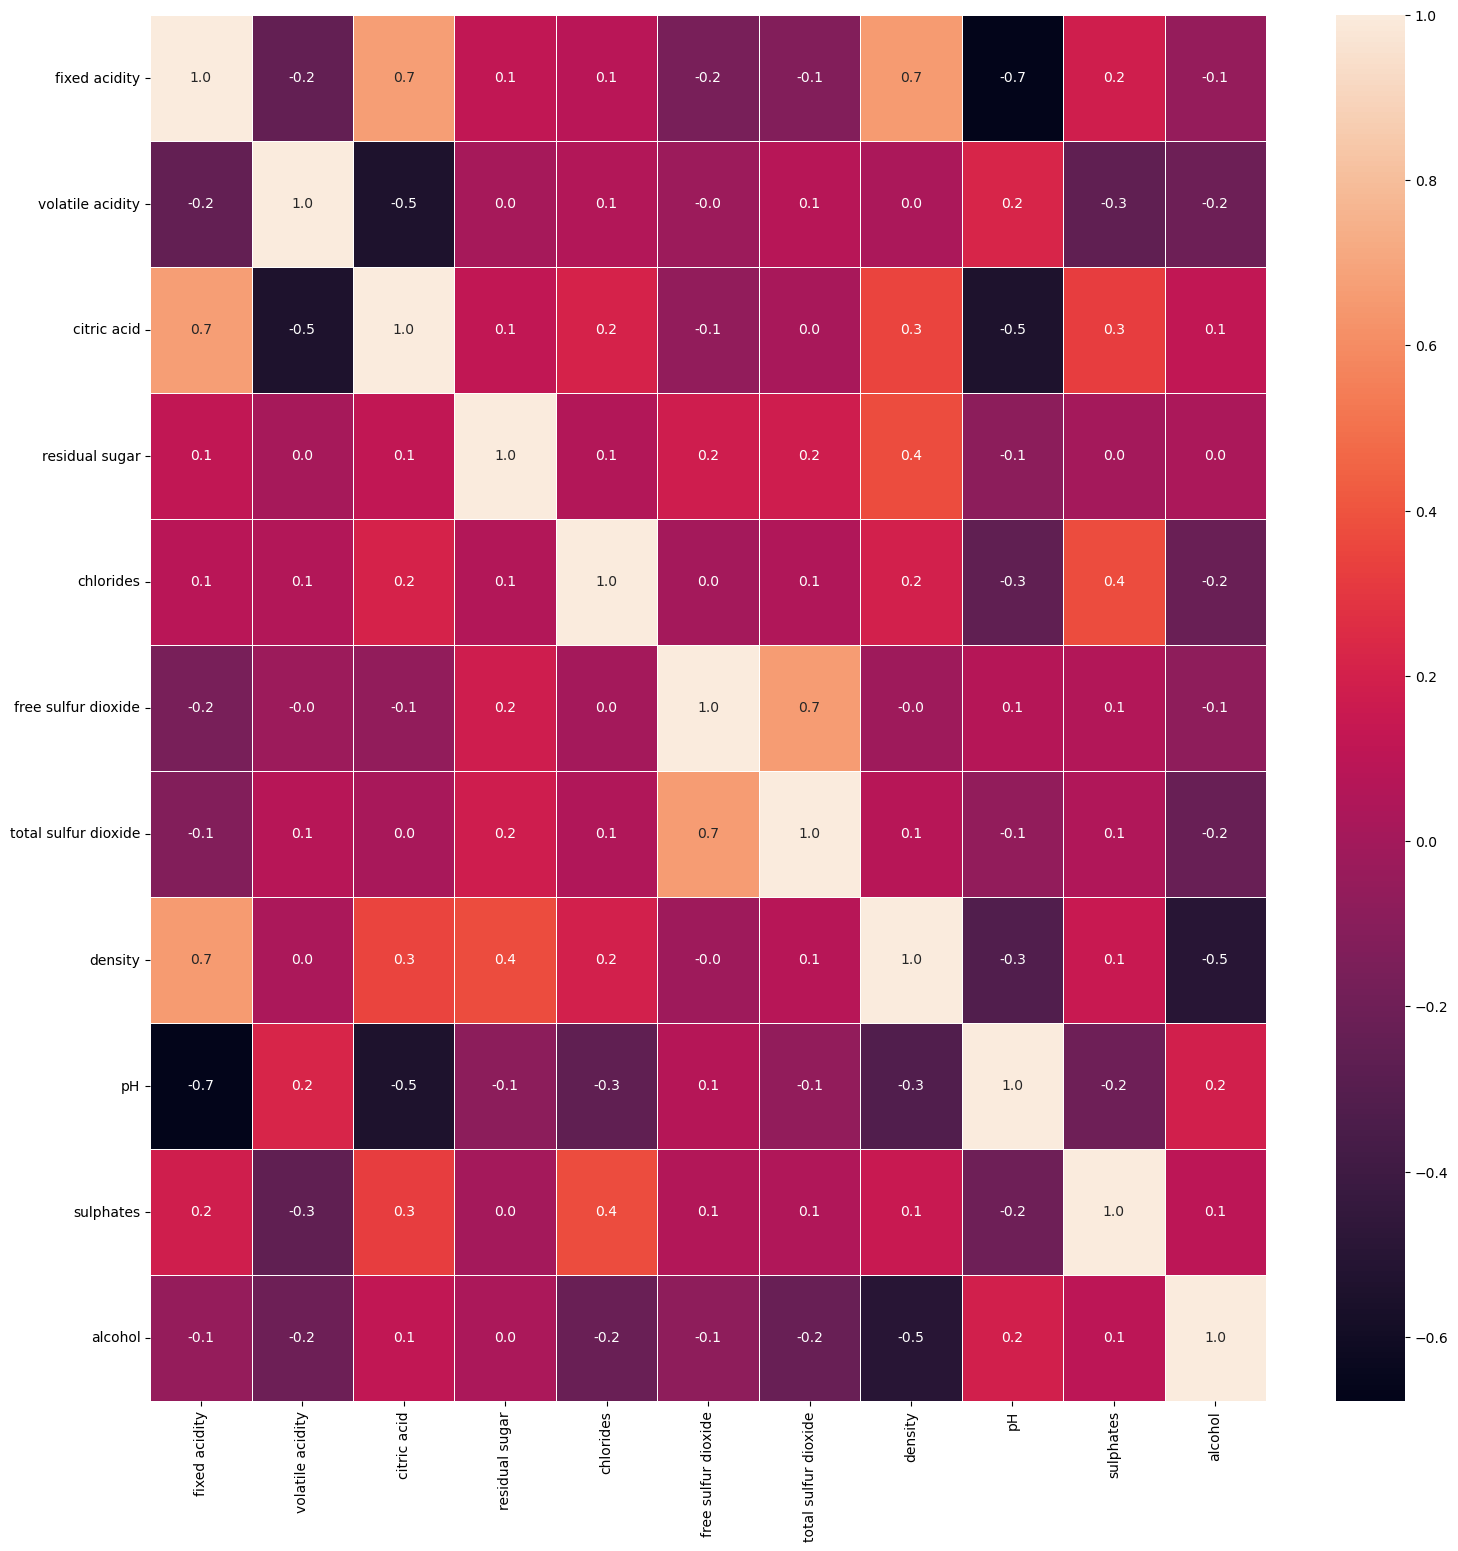

In [48]:
cor = X_train.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cor, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Visualization of Standardization Data 

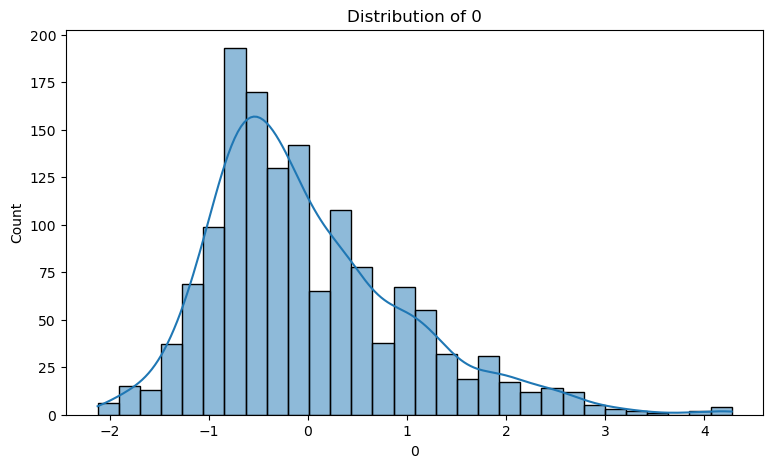

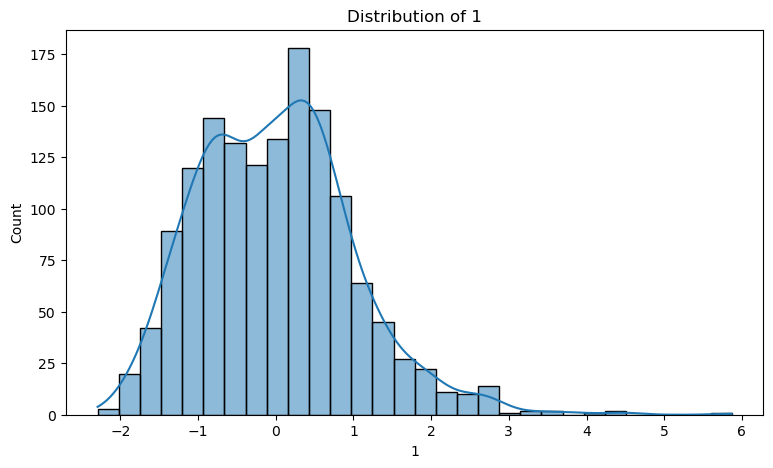

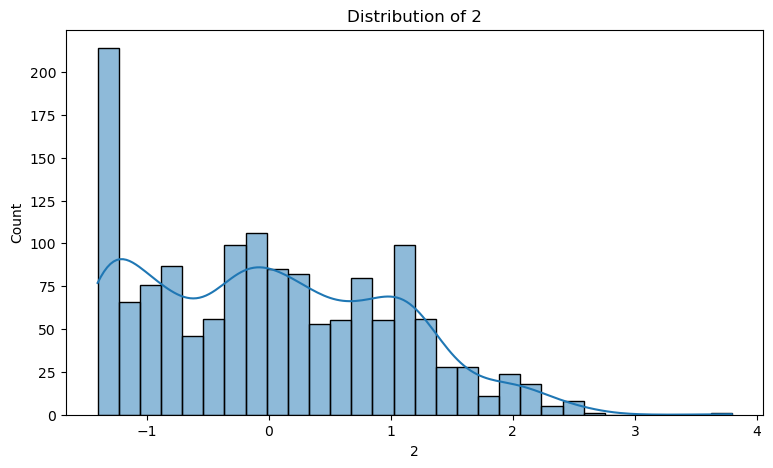

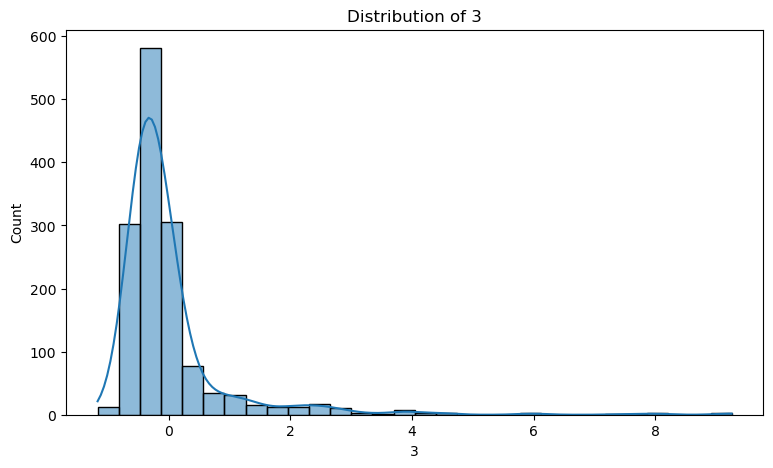

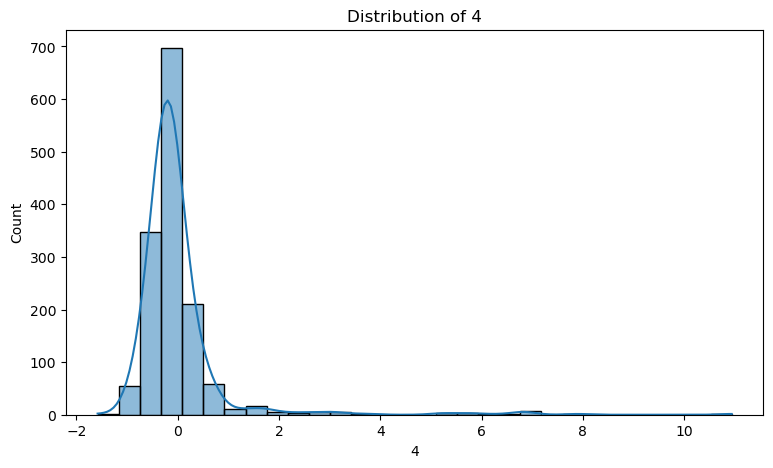

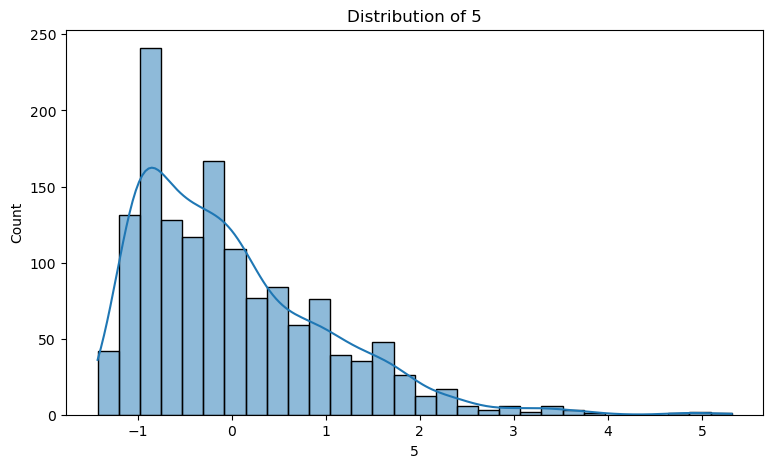

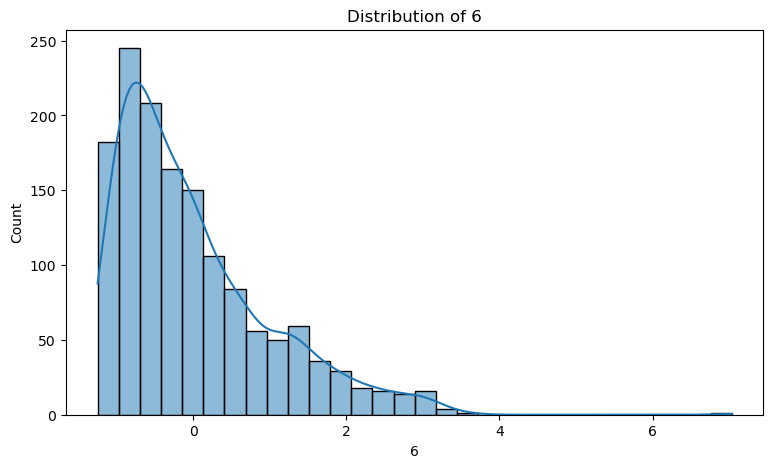

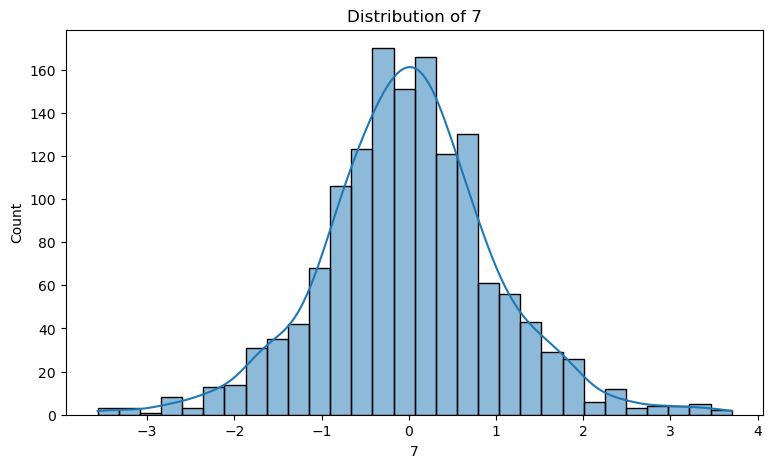

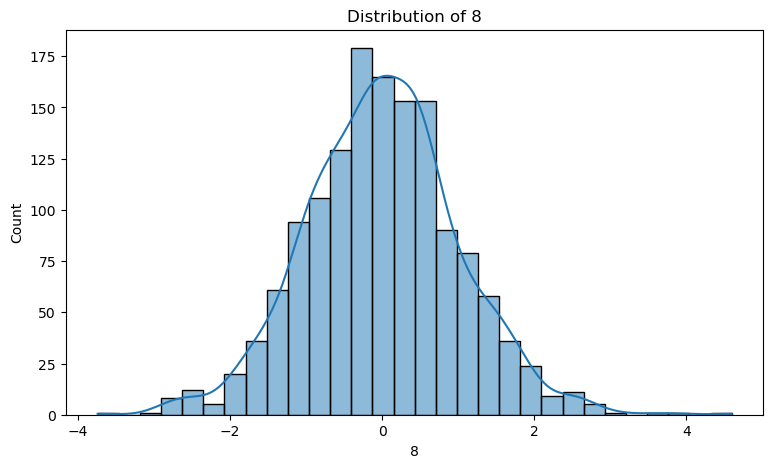

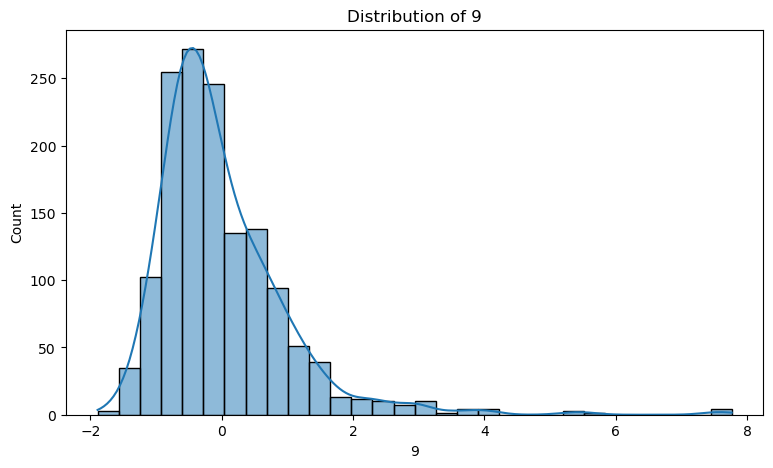

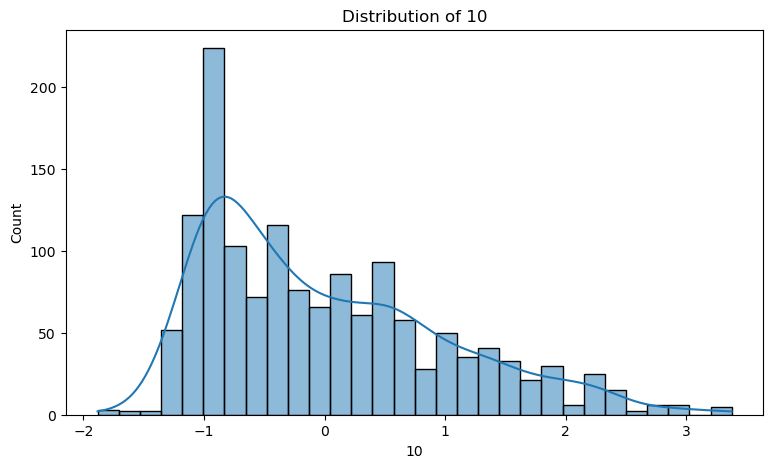

In [50]:
for column in pd.DataFrame(X_train_std).columns:
    plt.figure(figsize=(9, 5))
    sns.histplot(data=pd.DataFrame(X_train_std), x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

## Model Training, Evaluating and Compare with DummyClassifier

In [104]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy = "most_frequent").fit(X_train_std, y_train)

In [106]:
print("Dummy Classifier'ın Test Setindeki Doğruluğu:", dummy_clf.score(X_test_std, y_test))

Dummy Classifier'ın Test Setindeki Doğruluğu: 0.9


+ Dummy Classifier'dan elde edilen sonuç 0.9 gibi büyük bir değer. Yani bu da veri setinde dengesizliğin olduğunu gösteriyor.

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [85]:
classification_models = {"Decision Tree": DecisionTreeClassifier(),
                        "Random Forest": RandomForestClassifier(),
                        "Gradient Boosting": GradientBoostingClassifier(),
                        "Ada Boost": AdaBoostClassifier(),
                        "KNN": KNeighborsClassifier(),
                        "Logistic Regression": LogisticRegression(),
                        "Linear SVM": SVC(kernel = "linear"),
                        "RBF SVM": SVC(kernel = "rbf"),
                        "Polynomial SVM": SVC(kernel = "poly")}

In [114]:
model_names = []
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []
roc_auc = []

for name, clf in classification_models.items():
    clf.fit(X_train_std, y_train)
    predictions = clf.predict(X_test_std)
    train_score = clf.score(X_train_std, y_train)
    test_score = accuracy_score(y_test, predictions)
    score_precision = precision_score(y_test, predictions)
    score_recall = recall_score(y_test, predictions)
    score_f1 = f1_score(y_test, predictions)
    score_roc_auc = roc_auc_score(y_test, predictions)

    model_names.append(name)
    train_accuracy.append(train_score)
    test_accuracy.append(test_score)
    precision.append(score_precision)
    recall.append(score_recall)
    f1.append(score_f1)
    roc_auc.append(score_roc_auc)

    print(f"{name} Train setindeki doğruluk: {train_score}")
    print(f"{name} Test setindeki doğruluk: {test_score}")
    print(f"{name} Precision (Hassasiyet): {score_precision}")
    print(f"{name} Recall (Duyarlılık): {score_recall}")
    print(f"{name} F1 Skoru: {score_f1}")
    print(f"{name} ROC-AUC Skoru: {score_roc_auc}\n")

Decision Tree Train setindeki doğruluk: 1.0
Decision Tree Test setindeki doğruluk: 0.88125
Decision Tree Precision (Hassasiyet): 0.42105263157894735
Decision Tree Recall (Duyarlılık): 0.5
Decision Tree F1 Skoru: 0.45714285714285713
Decision Tree ROC-AUC Skoru: 0.7118055555555556

Random Forest Train setindeki doğruluk: 1.0
Random Forest Test setindeki doğruluk: 0.925
Random Forest Precision (Hassasiyet): 0.625
Random Forest Recall (Duyarlılık): 0.625
Random Forest F1 Skoru: 0.625
Random Forest ROC-AUC Skoru: 0.7916666666666667

Gradient Boosting Train setindeki doğruluk: 0.9624739402362752
Gradient Boosting Test setindeki doğruluk: 0.93125
Gradient Boosting Precision (Hassasiyet): 0.6923076923076923
Gradient Boosting Recall (Duyarlılık): 0.5625
Gradient Boosting F1 Skoru: 0.6206896551724138
Gradient Boosting ROC-AUC Skoru: 0.767361111111111

Ada Boost Train setindeki doğruluk: 0.8999305072967339
Ada Boost Test setindeki doğruluk: 0.8875
Ada Boost Precision (Hassasiyet): 0.4375
Ada Boos

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


KNN Train setindeki doğruluk: 0.9124391938846421
KNN Test setindeki doğruluk: 0.8625
KNN Precision (Hassasiyet): 0.35
KNN Recall (Duyarlılık): 0.4375
KNN F1 Skoru: 0.3888888888888889
KNN ROC-AUC Skoru: 0.673611111111111

Logistic Regression Train setindeki doğruluk: 0.8832522585128562
Logistic Regression Test setindeki doğruluk: 0.86875
Logistic Regression Precision (Hassasiyet): 0.2727272727272727
Logistic Regression Recall (Duyarlılık): 0.1875
Logistic Regression F1 Skoru: 0.2222222222222222
Logistic Regression ROC-AUC Skoru: 0.5659722222222222

Linear SVM Train setindeki doğruluk: 0.8603196664350243
Linear SVM Test setindeki doğruluk: 0.9
Linear SVM Precision (Hassasiyet): 0.0
Linear SVM Recall (Duyarlılık): 0.0
Linear SVM F1 Skoru: 0.0
Linear SVM ROC-AUC Skoru: 0.5

RBF SVM Train setindeki doğruluk: 0.8999305072967339
RBF SVM Test setindeki doğruluk: 0.8875
RBF SVM Precision (Hassasiyet): 0.4166666666666667
RBF SVM Recall (Duyarlılık): 0.3125
RBF SVM F1 Skoru: 0.35714285714285715
R

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
